<a href="https://colab.research.google.com/github/Priks06/ACI-Assignment1-PacketDeliveryAgent/blob/feature%2Fobjective-function-calculation/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [22]:
from pomegranate import *

In [35]:
!pip install graphviz

In [23]:
import numpy as np
import pandas as pd

In [175]:
dataset=pd.read_csv("/content/data_banknote.txt", names=["variance","skewness","curtosis","entropy","class"])

In [176]:
dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [180]:
dataset.rename(columns={"variance":"variance_original","skewness":"skewness_original", "curtosis":"curtosis_original", "entropy":"entropy_original"}, inplace=True)

In [181]:
dataset.head()

,variance_original,skewness_original,curtosis_original,entropy_original,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [26]:
dataset["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

In [27]:
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot

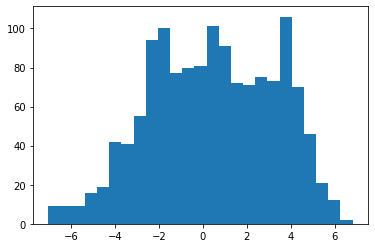

In [28]:
# histogram of the raw data
pyplot.hist(dataset["variance"], bins=25)
pyplot.show()

In [36]:
dataset.head()

,variance,skewness,curtosis,entropy,class
0,high,high,low,high,0
1,high,high,low,medium,0
2,high,medium,low,high,0
3,high,high,low,medium,0
4,medium,medium,medium,high,0


In [182]:
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
dataset["variance"]=pd.DataFrame(trans.fit_transform(dataset.values[:, 0].reshape(-1, 1)))
dataset["skewness"]=pd.DataFrame(trans.fit_transform(dataset.values[:, 1].reshape(-1, 1)))
dataset["curtosis"]=pd.DataFrame(trans.fit_transform(dataset.values[:, 2].reshape(-1, 1)))
dataset["entropy"]=pd.DataFrame(trans.fit_transform(dataset.values[:, 3].reshape(-1, 1)))

In [ ]:
dataset["variance"][dataset["variance"]==0]="low"
dataset["skewness"][dataset["skewness"]==0]="low"
dataset["curtosis"][dataset["curtosis"]==0]="low"
dataset["entropy"][dataset["entropy"]==0]="low"

dataset["variance"][dataset["variance"]==1]="medium"
dataset["skewness"][dataset["skewness"]==1]="medium"
dataset["curtosis"][dataset["curtosis"]==1]="medium"
dataset["entropy"][dataset["entropy"]==1]="medium"

dataset["variance"][dataset["variance"]==2]="high"
dataset["skewness"][dataset["skewness"]==2]="high"
dataset["curtosis"][dataset["curtosis"]==2]="high"
dataset["entropy"][dataset["entropy"]==2]="high"

In [184]:
dataset.head()

,variance_original,skewness_original,curtosis_original,entropy_original,class,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699,0,high,high,low,high
1,4.54590,8.1674,-2.4586,-1.46210,0,high,high,low,medium
2,3.86600,-2.6383,1.9242,0.10645,0,high,medium,low,high
3,3.45660,9.5228,-4.0112,-3.59440,0,high,high,low,medium
4,0.32924,-4.4552,4.5718,-0.98880,0,medium,medium,medium,high


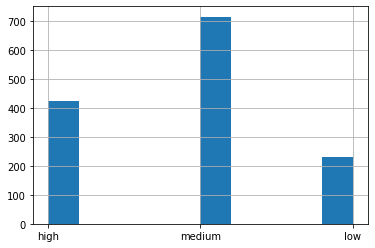

In [31]:
dataset["variance"].hist()
pyplot.show()

In [58]:
len(dataset[(dataset["variance"]=="high")&(dataset["skewness"]=="high")&(dataset["curtosis"]=="low")])/len(dataset)

0.14868804664723032

In [201]:
trans.get_params()

{'encode': 'ordinal', 'n_bins': 3, 'strategy': 'uniform'}

In [43]:
values=["high", "medium", "low"]



0
114
0


In [ ]:
!pip install truth-table-generator

In [45]:
import ttg
print(ttg.Truths(['p', 'q', 'r']))

+-----+-----+-----+
|  p  |  q  |  r  |
|-----+-----+-----|
|  1  |  1  |  1  |
|  1  |  1  |  0  |
|  1  |  0  |  1  |
|  1  |  0  |  0  |
|  0  |  1  |  1  |
|  0  |  1  |  0  |
|  0  |  0  |  1  |
|  0  |  0  |  0  |
+-----+-----+-----+


In [186]:
value=['medium', 'high', 'low']

CPT=pd.DataFrame(columns=["variance","skewness","curtosis", "prob"]) 
CPT["prob"]=0
datasetLength=len(dataset)
for variance_value in value:
  for skewness_value in value:
    for curtosis_value in value:
      count=dataset[(dataset["variance"]==variance_value)&(dataset["skewness"]==skewness_value)&(dataset["curtosis"]==curtosis_value)].count().values[0]
      prob=count/datasetLength
      df=pd.DataFrame({"variance":[variance_value],"skewness":[skewness_value],"curtosis": curtosis_value, "prob":prob})
      CPT=CPT.append(df,ignore_index=True)


In [187]:
dataset["variance"].value_counts()["medium"]/len(dataset)

0.5211370262390671

In [188]:
variance = DiscreteDistribution({'high': dataset["variance"].value_counts()["high"]/len(dataset), 'medium': dataset["variance"].value_counts()["medium"]/len(dataset), 'low': dataset["variance"].value_counts()["low"]/len(dataset)})
skewness = DiscreteDistribution({'high': dataset["skewness"].value_counts()["high"]/len(dataset), 'medium': dataset["skewness"].value_counts()["medium"]/len(dataset), 'low': dataset["skewness"].value_counts()["low"]/len(dataset)})
curtosis = DiscreteDistribution({'high': dataset["curtosis"].value_counts()["high"]/len(dataset), 'medium': dataset["curtosis"].value_counts()["medium"]/len(dataset), 'low': dataset["curtosis"].value_counts()["low"]/len(dataset)})


In [189]:
entropy = ConditionalProbabilityTable(CPT.values.tolist(), [variance, skewness, curtosis])

In [190]:
value=['medium', 'high', 'low']

entropy_CPT=pd.DataFrame(columns=["entropy", "prob"]) 
datasetLength=len(dataset)
for entropy_value in value:
  count=dataset[(dataset["entropy"]==entropy_value)].count().values[0]
  prob=count/datasetLength
  df=pd.DataFrame({"entropy":[entropy_value], "prob":prob})
  entropy_CPT=entropy_CPT.append(df,ignore_index=True)

In [191]:
dataset["class"].value_counts()[0]

762

In [192]:
entropy = DiscreteDistribution({'high': dataset["entropy"].value_counts()["high"]/len(dataset), 'medium': dataset["entropy"].value_counts()["medium"]/len(dataset), 'low': dataset["entropy"].value_counts()["low"]/len(dataset)})

In [193]:
class_name = DiscreteDistribution({'0': dataset["class"].value_counts()[0]/len(dataset), '1': dataset["class"].value_counts()[1]/len(dataset)})

In [194]:
s1 = Node(variance, name="variance")
s2 = Node(skewness, name="skewness")
s3 = Node(curtosis, name="curtosis")
s4 = Node(entropy, name="entropy")
s5 = Node(class_name, name="class")

model = BayesianNetwork("Bank Note")
model.add_states(s1, s2, s3, s4, s5)
model.add_edge(s1, s4)
model.add_edge(s2, s4)
model.add_edge(s3, s4)
model.add_edge(s4, s5)
model.bake()

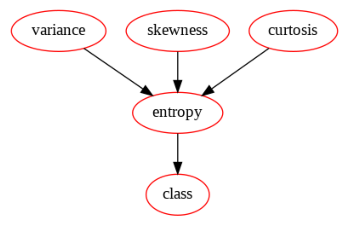

In [195]:
model.plot()

In [246]:
model.from_structure(("entropy",), ("entropy",), ())

TypeError: ignored

In [247]:
s5

{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "0" : 0.5553935860058309,
                "1" : 0.4446064139941691
            }
        ],
        "frozen" : false
    },
    "name" : "class",
    "weight" : 1.0
}

In [162]:
2.	Predict the probability of  data having the following values :Variance: 3.6216 , skewness: 8.6661, curtosis : -2.8073 , entropy : -0.44699, and the class is 0.

SyntaxError: ignored

In [206]:
dataset["skewness"][(dataset["skewness_original"]>=8.6661)&(dataset["skewness_original"]<=9.0)].value_counts()

high    28
Name: skewness, dtype: int64

In [211]:
dataset["variance"][(dataset["variance_original"]>=3.6216)&(dataset["variance_original"]<=3.7)].value_counts()

high    11
Name: variance, dtype: int64

In [209]:
dataset["curtosis"][(dataset["curtosis_original"]>=-2.8073)&(dataset["curtosis_original"]<=-2)].value_counts()

low    81
Name: curtosis, dtype: int64

In [210]:
dataset["entropy"][(dataset["entropy_original"]>=-0.44699)&(dataset["entropy_original"]<=0)].value_counts()

high    159
Name: entropy, dtype: int64

In [213]:
 print(model.probability([['high', 'high', 'low', 'high', "0"]]))

0.026145368688096318


In [ ]:
3.	Predict the if the note is genuine or fake with the following attribute values: Variance: -1.8439, skewness: -8.6475, curtosis : 7.6796 , entropy : -0.66682.

In [225]:
prediction_data=dataset.copy()

In [226]:
prediction_data.drop(columns=["variance_original", "skewness_original", "curtosis_original", "entropy_original"], inplace=True)

In [216]:
 print("variance", dataset["variance"][(dataset["variance_original"]>=-1.84)&(dataset["variance_original"]<=-1.0)].value_counts())
 print("skewness", dataset["skewness"][(dataset["skewness_original"]>=-8.6475)&(dataset["skewness_original"]<=-8)].value_counts())
 print("curtosis", dataset["curtosis"][(dataset["curtosis_original"]>=7.67)&(dataset["curtosis_original"]<=8.0)].value_counts())
 print("entropy", dataset["entropy"][(dataset["entropy_original"]>=-0.66682)&(dataset["entropy_original"]<=0)].value_counts())
 print(model.predict([['medium', 'low', 'medium', 'high', None]]))

variance medium    134
Name: variance, dtype: int64
skewness low    15
Name: skewness, dtype: int64
curtosis medium    15
Name: curtosis, dtype: int64
entropy high    243
Name: entropy, dtype: int64


AssertionError: ignored

In [236]:
model.predict([['medium', 'low', 'medium', 'high', "0"]])

AssertionError: ignored

In [237]:
model.structure

((), (), (), (), ())

In [230]:
prediction_data["class"]=prediction_data["class"].apply(str)

In [234]:
model.summarize(prediction_data)

KeyError: ignored

In [21]:
variance = DiscreteDistribution({'high': 1./3, 'medium': 1./3, 'low': 1./3})
skewness = DiscreteDistribution({'high': 1./3, 'medium': 1./3, 'low': 1./3})
curtosis = DiscreteDistribution({'high': 1./3, 'medium': 1./3, 'low': 1./3})

s1 = Node(variance, name="variance")
s2 = Node(skewness, name="skewness")
s3 = Node(curtosis, name="curtosis")
s4 = Node(entropy, name="entropy")
s5 = Node(class_name, name="class")

model = BayesianNetwork("Bank Note")
model.add_states(s1, s2, s3, s4, s5)
model.add_edge(s1, s4)
model.add_edge(s2, s4)
model.add_edge(s3, s4)
model.add_edge(s4, s5)
model.bake()

NameError: ignored

In [10]:
model = BayesianNetwork.from_samples(dataset, algorithm='exact')

In [ ]:
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

In [44]:
!sudo pip install pygraphviz

  Using cached https://files.pythonhosted.org/packages/3a/d6/2c56f09ee83dbebb62c40487e4c972135661b9984fec9b30b77fb497090c/pygraphviz-1.7.zip
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp37-cp37m-linux_x86_64.whl size=166131 sha256=430100c24c47bb76e81c074a748d025e364c0238ea2bfa8a1e8cf4c355763a98
  Stored in directory: /root/.cache/pip/wheels/32/59/00/14934a4292c4359eeabcdbf90f33d309b55d0f1be8a1262523
Successfully built pygraphviz


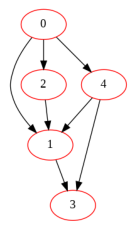

In [11]:
model.plot()

In [41]:
model.bake()

In [47]:

guest = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})
prize = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})
monty = ConditionalProbabilityTable(
        [['A', 'A', 'A', 0.0],
         ['A', 'A', 'B', 0.5],
         ['A', 'A', 'C', 0.5],
         ['A', 'B', 'A', 0.0],
         ['A', 'B', 'B', 0.0],
         ['A', 'B', 'C', 1.0],
         ['A', 'C', 'A', 0.0],
         ['A', 'C', 'B', 1.0],
         ['A', 'C', 'C', 0.0],
         ['B', 'A', 'A', 0.0],
         ['B', 'A', 'B', 0.0],
         ['B', 'A', 'C', 1.0],
         ['B', 'B', 'A', 0.5],
         ['B', 'B', 'B', 0.0],
         ['B', 'B', 'C', 0.5],
         ['B', 'C', 'A', 1.0],
         ['B', 'C', 'B', 0.0],
         ['B', 'C', 'C', 0.0],
         ['C', 'A', 'A', 0.0],
         ['C', 'A', 'B', 1.0],
         ['C', 'A', 'C', 0.0],
         ['C', 'B', 'A', 1.0],
         ['C', 'B', 'B', 0.0],
         ['C', 'B', 'C', 0.0],
         ['C', 'C', 'A', 0.5],
         ['C', 'C', 'B', 0.5],
         ['C', 'C', 'C', 0.0]], [guest, prize])

s1 = Node(guest, name="guest")
s2 = Node(prize, name="prize")
s3 = Node(monty, name="monty")

model = BayesianNetwork("Monty Hall Problem")
model.add_states(s1, s2, s3)
model.add_edge(s1, s3)
model.add_edge(s2, s3)
model.bake()

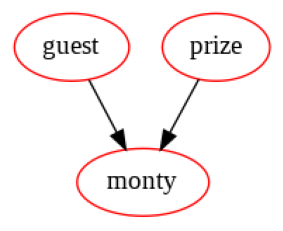

In [48]:
model.plot()

In [13]:
np.save("data.npy")

TypeError: ignored

In [14]:
import os
import numpy as np


# filename for the file you want to save
output_filename = "data.npy"

homedir = os.path.expanduser("~")

# construct the directory string
pathset = "data"

# check the directory does not exist
if not(os.path.exists(pathset)):

    # create the directory you want to save to
    os.mkdir(pathset)

    ds = {"ORE_MAX_GIORNATA": 5}

    # write the file in the new directory
    np.save(os.path.join(pathset, output_filename), ds)

In [17]:
import numpy
X = numpy.load('data/data.npy',allow_pickle=True)

In [19]:
model = BayesianNetwork.from_samples(X, algorithm='exact')
model.plot()

IndexError: ignored

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

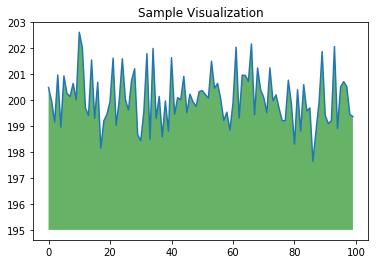

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
